# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 48.8304 - 173ms/epoch - 5ms/step
Epoch 2/100
32/32 - 0s - loss: 4.6198 - 16ms/epoch - 498us/step
Epoch 3/100
32/32 - 0s - loss: 1.5056 - 16ms/epoch - 500us/step
Epoch 4/100
32/32 - 0s - loss: 0.6660 - 16ms/epoch - 500us/step
Epoch 5/100
32/32 - 0s - loss: 0.4208 - 16ms/epoch - 500us/step
Epoch 6/100
32/32 - 0s - loss: 0.3687 - 15ms/epoch - 469us/step
Epoch 7/100
32/32 - 0s - loss: 0.3566 - 16ms/epoch - 502us/step
Epoch 8/100
32/32 - 0s - loss: 0.3523 - 15ms/epoch - 469us/step
Epoch 9/100
32/32 - 0s - loss: 0.3424 - 16ms/epoch - 500us/step
Epoch 10/100
32/32 - 0s - loss: 0.3404 - 15ms/epoch - 471us/step
Epoch 11/100
32/32 - 0s - loss: 0.3525 - 16ms/epoch - 500us/step
Epoch 12/100
32/32 - 0s - loss: 0.3443 - 16ms/epoch - 500us/step
Epoch 13/100
32/32 - 0s - loss: 0.3468 - 16ms/epoch - 500us/step
Epoch 14/100
32/32 - 0s - loss: 0.3489 - 16ms/epoch - 510us/step
Epoch 15/100
32/32 - 0s - loss: 0.3416 - 15ms/epoch - 469us/step
Epoch 16/100
32/32 - 0s - loss: 0.

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 2.0133443],
        [-3.011844 ]], dtype=float32),
 array([5.0160356], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0133443],
       [-3.011844 ]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0160356], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-13.8],
       [  7.9],
       [  3.1],
       [ -9. ],
       [ -0.9],
       [ 23.4],
       [ 16.3],
       [ 18.7],
       [-30.6],
       [ 20.1],
       [-19.3],
       [  4.2],
       [ -9.2],
       [ 15. ],
       [ 21.5],
       [  4.3],
       [ 16.3],
       [-14.3],
       [-20.5],
       [-16.1],
       [ 24.3],
       [-20.4],
       [ 20.5],
       [-17. ],
       [ 15.4],
       [ 16. ],
       [ 15.2],
       [-16.3],
       [ 30.8],
       [  4.8],
       [ 26. ],
       [ 49.7],
       [  8.5],
       [ -2.7],
       [ -1.6],
       [ 29.2],
       [ 44.3],
       [-40. ],
       [-19.7],
       [ 17. ],
       [  6.3],
       [-13.1],
       [-10.2],
       [ 10.3],
       [ 50.2],
       [-15.9],
       [ 19.9],
       [  2.1],
       [ 10.1],
       [  5.8],
       [ 11.5],
       [-18.3],
       [-26. ],
       [ 36.2],
       [-22.1],
       [-12.6],
       [ 14.2],
       [ 45. ],
       [-31.6],
       [ -6.7],
       [-21. ],
       [ -7.9],
       [

In [9]:
training_data['targets'].round(1)

array([[ -1.9],
       [  3.2],
       [ 31.8],
       [  5.1],
       [ 20.7],
       [ 17.4],
       [ 33. ],
       [  8.4],
       [ 32.7],
       [ 12. ],
       [ -5.9],
       [-24. ],
       [ 13. ],
       [-37.8],
       [-27.5],
       [-15.5],
       [  1. ],
       [ -2.1],
       [-36.2],
       [ 34.7],
       [ 13.9],
       [ -8.5],
       [ 45.3],
       [ -7.6],
       [-11.1],
       [ -5.4],
       [-27.1],
       [ 10.2],
       [ 21.1],
       [-16.8],
       [ 13.9],
       [-12.1],
       [ 41.8],
       [ 27.3],
       [ -2.7],
       [ -1.1],
       [ 24.7],
       [-15.7],
       [  8.1],
       [  8.2],
       [-23.3],
       [ 16. ],
       [-18.6],
       [ -0.3],
       [-19. ],
       [  1.3],
       [  1.6],
       [ 22.4],
       [ -7.9],
       [ 15. ],
       [-32.1],
       [ 40.5],
       [  0.9],
       [-23. ],
       [  4.6],
       [  6.2],
       [ 24.8],
       [ 24.2],
       [-35.9],
       [  1.3],
       [ 16.7],
       [ 19.3],
       [

## Plotting the data

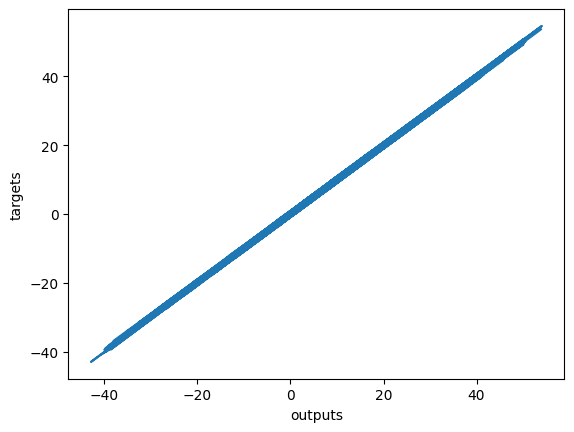

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()